# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install Xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,activation_year,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.00,1.78,0.11,0.10,40.61,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.65,2013,0.12,0.10,0.07,40.94,22.35,14.90,41.07,22.45,14.97,0.12,0.10,0.06,41.32,20.36,13.58,41.44,20.46,13.64,0.13,0.09,0.04,42.50,12.22,8.15,42.63,12.31,8.18,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.00,16.27,0.15,0.00,44.31,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80,2009,0.15,0.01,0.00,44.31,0.00,0.00,44.46,0.01,0.00,0.15,0.01,0.00,44.36,0.00,0.00,44.50,0.01,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.00,38.72,0.17,0.09,44.31,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.86,2010,0.17,0.09,0.00,44.39,0.00,0.00,44.56,0.09,0.00,0.17,0.09,0.00,44.44,0.00,0.00,44.61,0.09,0.00,0.17,0.09,0.00,44.44,0.00,0.00,44.61,0.09,0.00,0


In [4]:
df.drop(columns = 'Unnamed: 0', inplace=True)

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [5]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.15,0.00,0.00,44.27,0.00,0.00
1,038af19179925da21a25619c5a24b745,2015-02-01,0.15,0.00,0.00,44.27,0.00,0.00
2,038af19179925da21a25619c5a24b745,2015-03-01,0.15,0.00,0.00,44.27,0.00,0.00
3,038af19179925da21a25619c5a24b745,2015-04-01,0.15,0.00,0.00,44.27,0.00,0.00
4,038af19179925da21a25619c5a24b745,2015-05-01,0.15,0.00,0.00,44.27,0.00,0.00


In [6]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff_offpeak = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff_offpeak.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.01,0.16
1,0004351ebdd665e6ee664792efc4fd13,-0.00,0.18
2,0010bcc39e42b3c2131ed2ce55246e3c,0.05,1.50
3,0010ee3855fdea87602a5b7aba8e42de,-0.01,0.16
4,00114d74e963e47177db89bc70108537,-0.00,-0.00


In [7]:
#dataframe merge
df = pd.merge(df, diff_offpeak, on='id')

### Difference between mid-peak prices in December and preceding January

In [8]:
# Group mid-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_mid_peak_var': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_mid_peak_var': 'dec_1', 'price_mid_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['midpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_mid_peak_var']
diff['midpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_mid_peak_fix']
diff_midpeak = diff[['id', 'midpeak_diff_dec_january_energy','midpeak_diff_dec_january_power']]
diff_midpeak.head()

,id,midpeak_diff_dec_january_energy,midpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,0.00,0.07
1,0004351ebdd665e6ee664792efc4fd13,0.00,0.00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.00,0.00
3,0010ee3855fdea87602a5b7aba8e42de,0.00,0.07
4,00114d74e963e47177db89bc70108537,0.00,0.00


In [9]:
#dataframe merge
df = pd.merge(df, diff_midpeak, on='id')

### Difference between peak prices in December and preceding January

In [10]:
# Group peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_peak_var': 'mean', 'price_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_peak_var': 'dec_1', 'price_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['peak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_peak_var']
diff['peak_diff_dec_january_power'] = diff['dec_2'] - diff['price_peak_fix']
diff_peak = diff[['id', 'peak_diff_dec_january_energy','peak_diff_dec_january_power']]
diff_peak.head()

,id,peak_diff_dec_january_energy,peak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.00,0.10
1,0004351ebdd665e6ee664792efc4fd13,0.00,0.00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.00,0.00
3,0010ee3855fdea87602a5b7aba8e42de,-0.01,0.10
4,00114d74e963e47177db89bc70108537,0.00,0.00


In [11]:
#dataframe merge
df = pd.merge(df, diff_peak, on='id')

- The differences in payment for electricity peak prices between January and December will help us understand the seasonal variations in pricing and consumption patterns. By analyzing these differences, we can gain insights into how consumer behavior changes over the course of the year, especially during peak demand periods.

### Relevant time features extraction

In [12]:
# Reference date
reference_date = pd.to_datetime('2016-01-01')

# Create new features
df['tenure'] = (reference_date - df['date_activ']).dt.days // 30
df['months_activ'] = (reference_date - df['date_activ']).dt.days // 30
df['months_to_end'] = (df['date_end'] - reference_date).dt.days // 30
df['months_modif_prod'] = (reference_date - df['date_modif_prod']).dt.days // 30
df['months_renewal'] = (reference_date - df['date_renewal']).dt.days // 30

# Display the DataFrame with the new features
df[['tenure', 'months_activ', 'months_to_end', 'months_modif_prod', 'months_renewal']]

,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,31,31,5,2,6
1,77,77,8,77,4
2,69,69,3,69,8
3,70,70,2,70,9
4,72,72,2,72,9
...,...,...,...,...,...
14600,43,43,4,7,19
14601,40,40,7,40,4
14602,47,47,1,47,10
14603,40,40,8,40,4


In [13]:
df.drop(columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'],  inplace=True)

- Recalculating time features into numerical representations, such as months, can be beneficial for machine learning models. 

### Calculating the difference in average consumption in the past 12 month and last month

In [14]:
#Difference in average cosumption in the past 12 month and last month
# Calculate the difference
df['ele_consump_diff'] = (df['cons_12m']/12) - df['cons_last_month']

# Display the DataFrame with the new column
df[[ 'cons_12m','cons_last_month', 'ele_consump_diff']]


,cons_12m,cons_last_month,ele_consump_diff
0,0,0,0.00
1,4660,0,388.33
2,544,0,45.33
3,1584,0,132.00
4,4425,526,-157.25
...,...,...,...
14600,32270,0,2689.17
14601,7223,181,420.92
14602,1844,179,-25.33
14603,131,0,10.92


- By Calculating the difference in average consumption in the past 12 month and last month, we engineering features that could further help model prediction power

---

## 4. Data Transformation

#####  Non numerical columns are:
- has_gas, 
- channel_sales, 
- and origin_up

In [15]:
# has_gas transformation

# replace t for 1 and f for 0
df['has_gas']=df['has_gas'].replace({'t':1, 'f': 0})


In [16]:
# channel_sales and origin_up transformation

# Imbalanced Classes can affect model performance
print("\nCompany Origin:\n",df['origin_up'].value_counts())
print("\nChannel Sales:\n",df['channel_sales'].value_counts())

#removing the column feature with fewer data


Company Origin:
 origin_up
lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

Channel Sales:
 channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
#One hot encoding using get_dummies()
df = pd.get_dummies(df, columns = ['channel_sales', 'origin_up'])

In [19]:
# dropping values with very little occurences
df.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
                 'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa', 'origin_up_MISSING', 
                 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'], inplace=True)

#### Numerical Features tranformation

In [20]:
numeric_features = df[[
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]]
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14605.00,159230.27,573483.63,0.00,5674.00,14116.00,40764.00,6207104.00
cons_gas_12m,14605.00,28091.08,162978.56,0.00,0.00,0.00,0.00,4154590.00
cons_last_month,14605.00,16091.37,64366.26,0.00,0.00,793.00,3383.00,771203.00
forecast_cons_12m,14605.00,1868.64,2387.65,0.00,494.98,1112.61,2402.27,82902.83
forecast_cons_year,14605.00,1399.86,3247.88,0.00,0.00,314.00,1746.00,175375.00
forecast_discount_energy,14605.00,0.97,5.11,0.00,0.00,0.00,0.00,30.00
forecast_meter_rent_12m,14605.00,63.09,66.17,0.00,16.18,18.80,131.03,599.31
forecast_price_energy_off_peak,14605.00,0.14,0.02,0.00,0.12,0.14,0.15,0.27
forecast_price_energy_peak,14605.00,0.05,0.05,0.00,0.00,0.08,0.10,0.20
forecast_price_pow_off_peak,14605.00,43.13,4.49,0.00,40.61,44.31,44.31,59.27


##### Log Transformation

In [21]:
def apply_log(column):
    return np.log1p(column)

for column in numeric_features:
    df[column + '_log'] = apply_log(df[column])
    
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,activation_year,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,midpeak_diff_dec_january_energy,midpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,ele_consump_diff,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,cons_12m_log,cons_gas_12m_log,cons_last_month_log,forecast_cons_12m_log,forecast_cons_year_log,forecast_discount_energy_log,forecast_meter_rent_12m_log,forecast_price_energy_off_peak_log,forecast_price_energy_peak_log,forecast_price_pow_off_peak_log
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.00,1.78,0.11,0.10,40.61,1,0.00,25.44,25.44,2,678.99,3,43.65,2013,0.12,0.10,0.07,40.94,22.35,14.90,41.07,22.45,14.97,0.12,0.10,0.06,41.32,20.36,13.58,41.44,20.46,13.64,0.13,0.09,0.04,42.50,12.22,8.15,42.63,12.31,8.18,1,0.02,3.70,-0.07,-16.23,-0.02,-24.34,31,31,5,2,6,0.00,False,False,True,False,False,False,False,True,0.00,10.91,0.00,0.00,0.00,0.00,1.02,0.11,0.09,3.73
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.00,16.27,0.15,0.00,44.31,0,0.00,16.38,16.38,1,18.89,6,13.80,2009,0.15,0.01,0.00,44.31,0.00,0.00,44.46,0.01,0.00,0.15,0.01,0.00,44.36,0.00,0.00,44.50,0.01,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0,-0.00,0.18,0.00,0.00,0.00,0.00,77,77,8,77,4,388.33,True,False,False,False,False,True,False,False,8.45,0.00,0.00,5.25,0.00,0.00,2.85,0.14,0.00,3.81
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.00,38.72,0.17,0.09,44.31,0,0.00,28.60,28.60,1,6.60,6,13.86,2010,0.17,0.09,0.00,44.39,0.00,0.00,44.56,0.09,0.00,0.17,0.09,0.00,44.44,0.00,0.00,44.61,0.09,0.00,0.17,0.09,0.00,44.44,0.00,0.00,44.61,0.09,0.00,0,-0.00,0.18,0.00,0.00,0.00,0.00,69,69,3,69,8,45.33,False,False,True,False,False,True,False,False,6.30,0.00,0.00,3.89,0.00,0.00,3.68,0.15,0.08,3.81
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.00,19.83,0.15,0.00,44.31,0,0.00,30.22,30.22,1,25.46,6,13.20,2010,0.15,0.00,0.00,44.40,0.00,0.00,44.55,0.00,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0.15,0.00,0.00,44.44,0.00,0.00,44.59,0.00,0.00,0,-0.00,0.18,0.00,0.00,0.00,0.00,70,70,2,70,9,132.00,False,False,False,True,False,True,False,False,7.37,0.00,0.00,5.48,0.00,0.00,3.04,0.14,0.00,3.81
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.00,131.73,0.12,0.10,40.61,0,52.32,44.91,44.91,1,47.98,6,19.80,2010,0.12,0.10,0.07,40.69,24.41,16.28,40.81,24.52,16.35,0.12,0.10,0.07,40.73,24.44,16.29,40.85,24.54,16.37,0.12,0.10,0.07,40.73,24.44,16.29,40.85,24.54,16.37,0,-0.01,0.16,0.00,0.07,-0.00,0.10,72,72,2,72,9,-157.25,True,False,False,False,False,True,False,False,8.40,0.00,6.27,6.10,6.27,0.00,4.89,0.11,0.10,3.73


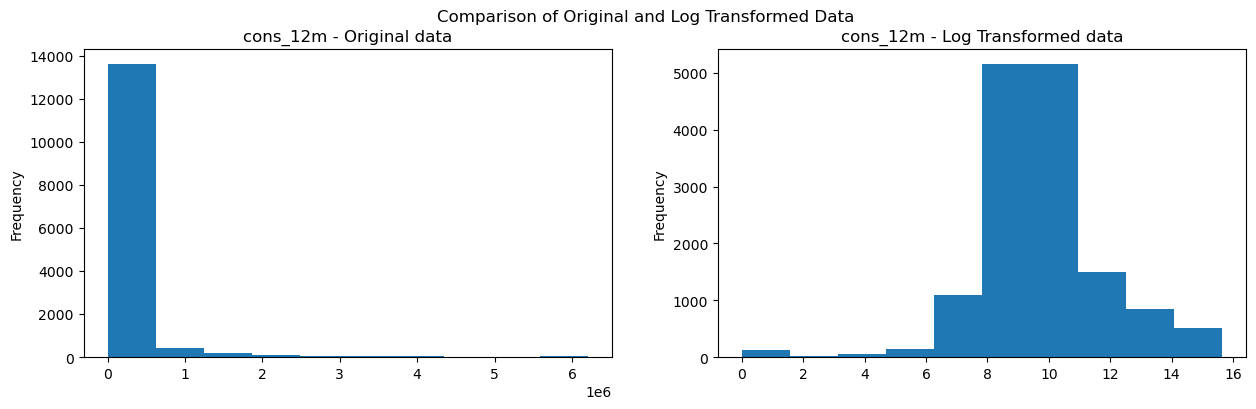

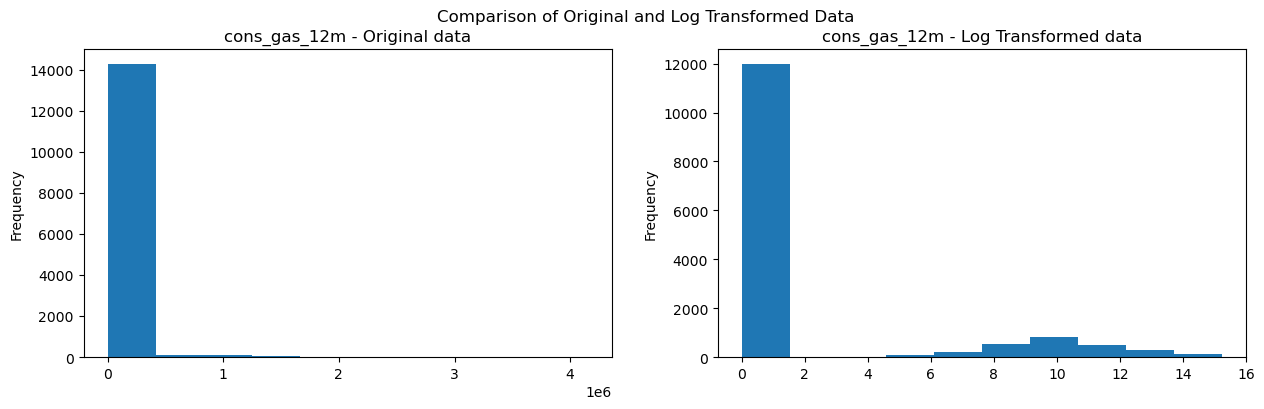

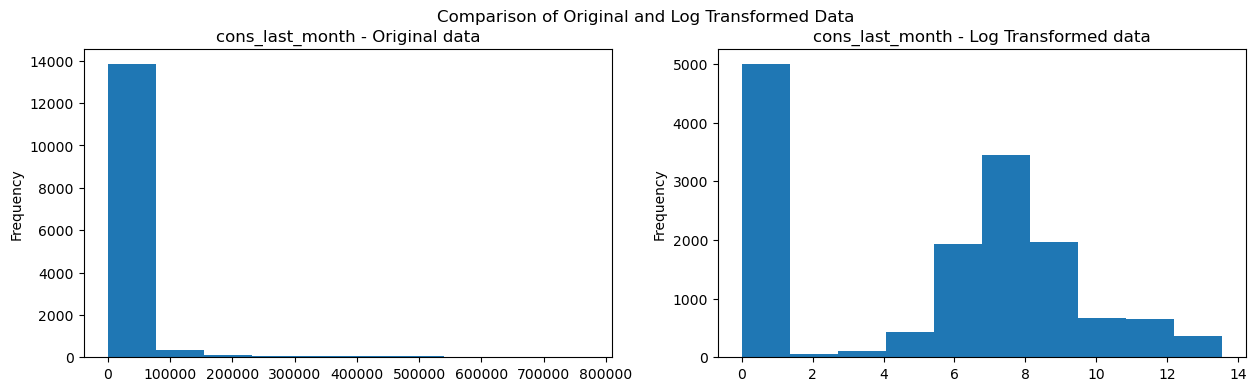

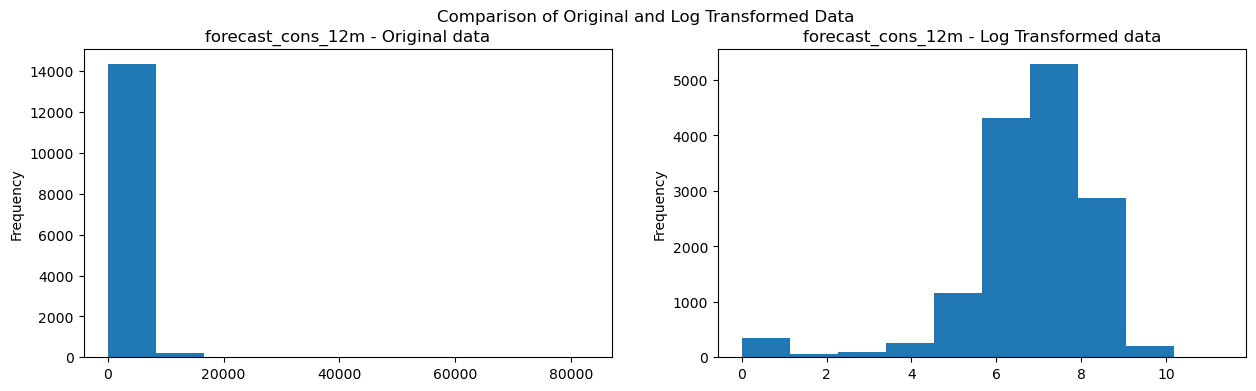

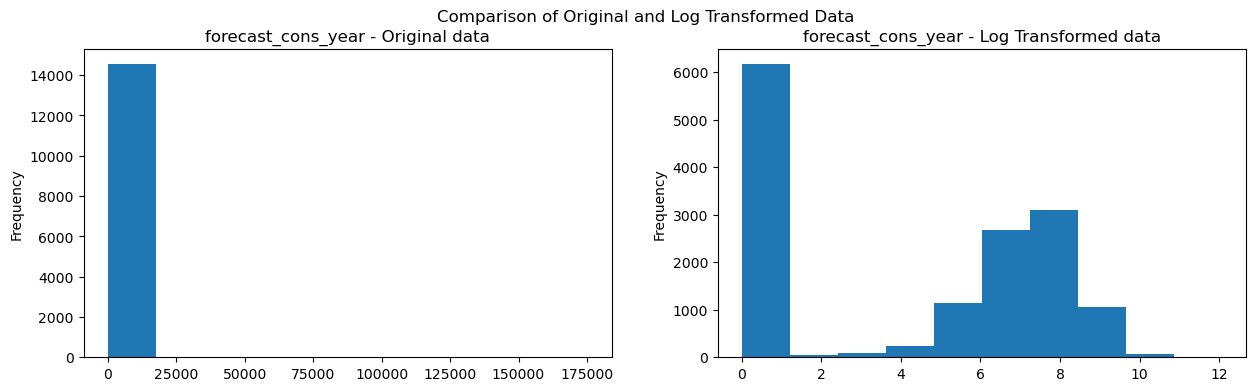

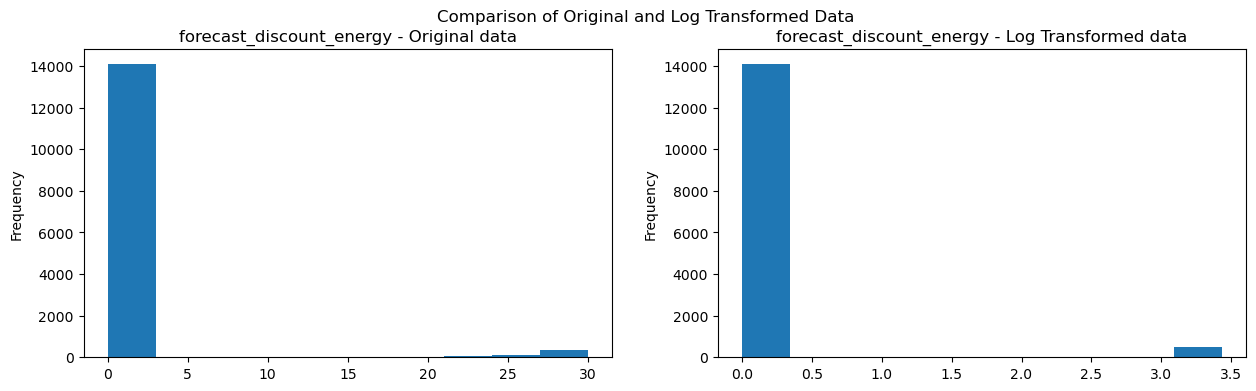

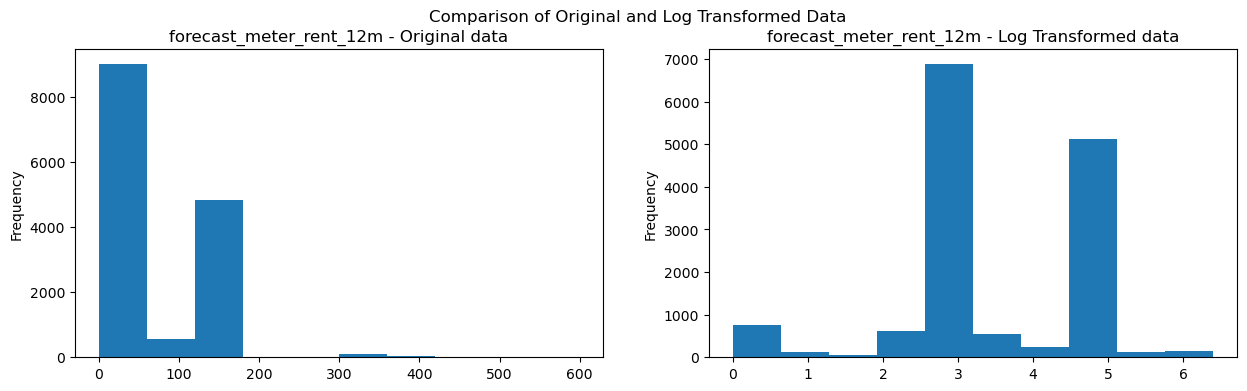

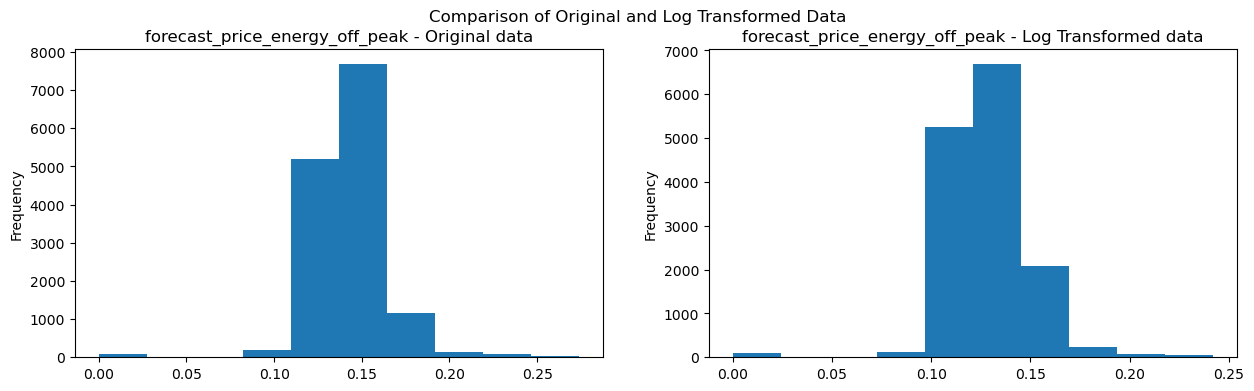

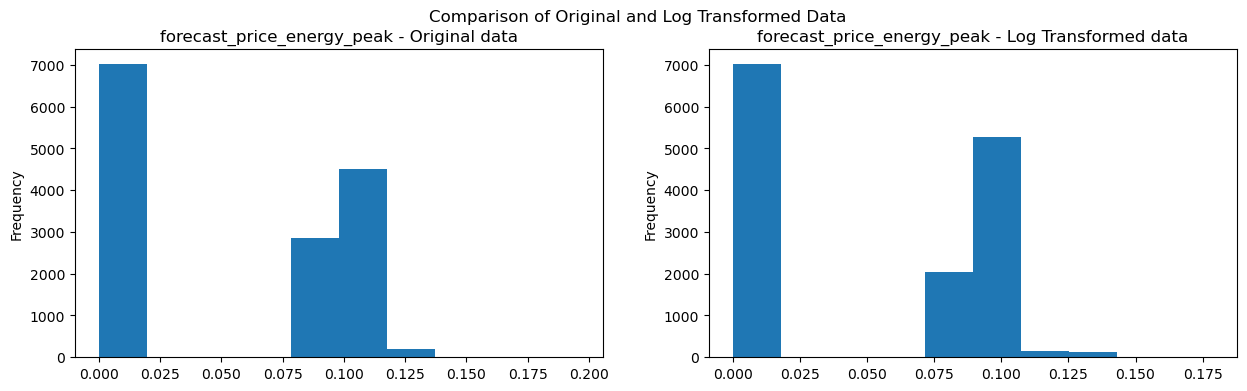

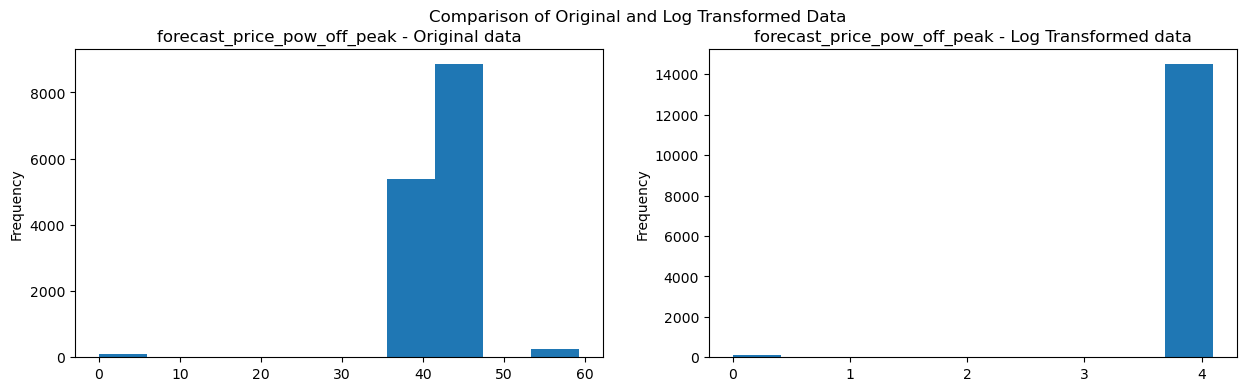

In [22]:
import matplotlib.pyplot as plt

def visualize_original_and_log(df, column, title):
    # Create axis for original data plot (ax1) and transformed data (ax2)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
    
    # Original data plot
    df[column].plot(kind='hist', ax=ax1)
    ax1.set_title(f'{column} - Original data')
    
    # Log-transformed data plot
    np.log1p(df[column]).plot(kind='hist', ax=ax2)  # Using np.log1p to handle potential zero values
    ax2.set_title(f'{column} - Log Transformed data')
    
    # Set overall title for the entire figure
    fig.suptitle(title, fontsize=12)

# Example usage:
# Assuming df is your DataFrame and 'numeric_features' is a list of column names
for column in numeric_features:
    visualize_original_and_log(df, column, 'Comparison of Original and Log Transformed Data')
    plt.show()


In [23]:
df.drop(columns = numeric_features, inplace=True)

#### Correlation Analysis
- It is important that data element(features) are not correlated within themselves because it can cause redundancy and affect model performance
- However, features correlating with the target column maybe important and enhance model prediction ability

In [25]:
correlation_df = df.corr()

ValueError: could not convert string to float: '24011ae4ebbe3035111d65fa7c15bc57'

In [ ]:
# Plot correlation
plt.figure(figsize=(60, 60))
sns.heatmap(
    correlation_df, 
    xticklabels=correlation_df.columns.values,
    yticklabels=correlation_df.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Feature Selection

#####  Multicollinearity can make it difficult for models to differentiate the individual effects of correlated features, impacting the stability and interpretability of the model.

- Therefore we will set our threshold at 0.70 and remove all this features that exhibit high correlation with independent features

In [ ]:
df.drop(columns=['mean_year_price_p3_var', 'mean_year_price_p1_fix', 'mean_year_price_p3_fix', 
                      'mean_year_price_p2', 'mean_year_price_p3', 'mean_6m_price_p3_var', 
                      'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p2',
                      'mean_6m_price_p3', 'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 
                      'mean_3m_price_p2_fix', 'mean_3m_price_p3_fix', 'mean_3m_price_p2', 'mean_3m_price_p3'],inplace = True)


             

In [ ]:
df.head(2)

---

## 5. Prediction Model

In [ ]:
# Dataset split into train and test model

#Dropping, ID and target (churn)
X = df.drop(columns= ['id', 'churn'])
y = df.churn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

In [ ]:
#Target value count

y.value_counts()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#Random forest classifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)  

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:', precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1-score:', f1_score(y_test, rfy_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfy_pred))

In [ ]:
# create a confusion matrix
rfcm = confusion_matrix(y_test, rfy_pred)

#Visualize the confusion matrix
sns.heatmap(rfcm, annot =True, cmap = 'Blues', fmt ='g')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Using 8 machine learning algorithm
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGB Classifier': XGBClassifier(),
    'SGD Classifier': SGDClassifier()
}

In [ ]:
accuracy_list = {}
precision_list = {}
recall_list = {}
f_list = {}
roc_list = {}

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
   
    a_score = accuracy_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    
    accuracy_list[model_name] = [str(round(a_score * 100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score * 100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score * 100, 2)) + '%']
    f_list[model_name] = [str(round(f_score * 100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score * 100, 2)) + '%']
    
    print(f'\n{model_name}')
    print('Accuracy:', accuracy_list[model_name])
    print('Precision:', precision_list[model_name])
    print('Recall:', recall_list[model_name])
    print('F1-score:', f_list[model_name])
    print('AUC-ROC:', roc_list[model_name])
    
    if model_name != list(classifiers.keys())[-1]:
        print('')

### Model Performance
- The Random Forest Model has the best performance out of all the models tested with precision and accuracy exceeding over 90%
- The true negatives were almost all correctly predicted with the exception of two, while only 24 true positive were correct and 433 was wrongly predicted
- This attributable to the high imbalance of the target column


### Evaluation Metrics:

1. **Accuracy:**
   - **Advantage:** Provides an overall measure of correct predictions.
   - **Disadvantage:** Misleading in imbalanced datasets, as high accuracy may result from predicting the majority class.

2. **Precision:**
   - **Advantage:** Focuses on the accuracy of positive predictions, crucial in scenarios where false positives are costly.
   - **Disadvantage:** Ignores false negatives, which might be important in some contexts.

3. **Recall:**
   - **Advantage:** Emphasizes the ability to capture all positive instances, crucial when false negatives are costly.
   - **Disadvantage:** Can be lower when there's a class imbalance, and false positives are not a major concern.

4. **F1-score:**
   - **Advantage:** Balances precision and recall, suitable for imbalanced datasets.
   - **Disadvantage:** Might not be the best choice if precision and recall are of unequal importance.

5. **AUC-ROC:**
   - **Advantage:** Evaluates the model's ability to distinguish between positive and negative instances across different probability thresholds.
   - **Disadvantage:** Interpretation might be challenging for non-technical stakeholders.

### Advantages and Disadvantages of Random Forest:

**Advantages:**
- **High Accuracy:** Random Forests generally provide high accuracy due to the ensemble of multiple decision trees.
- **Robust to Overfitting:** The ensemble nature helps mitigate overfitting, providing a more generalized model.
- **Handles Non-Linearity:** Suitable for capturing complex, non-linear relationships in the data.

**Disadvantages:**
- **Complexity:** Random Forests can become computationally expensive and complex, especially with a large number of trees.
- **Less Interpretable:** The ensemble nature makes it challenging to interpret the model compared to individual decision trees.
- **Biased Towards Majority Class:** In imbalanced datasets, Random Forests can be biased towards the majority class.

### Model Performance:

- **Satisfactory or Not:**
  - The high accuracy is misleading due to the imbalanced nature of the dataset.
  - Extremely low recall (4.6%) indicates the model's poor ability to capture true positives, which is crucial in a churn prediction scenario.
  - The F1-score (8.75%) further emphasizes the model's poor performance in balancing precision and recall.

### Financial Implications:

- **Savings Calculation:**
  - Without information on the costs associated with false positives and false negatives, it's challenging to estimate the financial impact.
  - If false positives are costly, the low precision might lead to financial losses for the client.

### Conclusion:

- **Recommendations:**
  - Considering the imbalanced nature of the dataset, model adjustments or alternative techniques might be explored.
  - Focus on improving recall to capture more instances of churn.

- **Assumptions:**
  - The financial impact of false positives and false negatives needs to be quantified for a more accurate assessment of the model's utility.

Model Understanding

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
